In [1]:
import pandas as pd

In [4]:
df = pd.DataFrame([[1,2],[3,4]],
                 columns=list('AB'))
df2 = pd.DataFrame([[5,6],[7,8]],
                 columns=list('AB'))
df3 = df.append(df2, ignore_index = True) # продолжение исходного индексирования

In [5]:
df3

,A,B
0,1,2
1,3,4
2,5,6
3,7,8


In [6]:
df3 = pd.concat([df,df2], ignore_index = True) # склеивание массивов

In [7]:
df3

,A,B
0,1,2
1,3,4
2,5,6
3,7,8


In [8]:
df3 = pd.concat([df,df2], keys = ['s1','s2']) # многомерные ключи

In [9]:
df3 

A  B
s1 0  1  2
   1  3  4
s2 0  5  6
   1  7  8

In [10]:
df3 = pd.concat([df,df2], keys = ['s1','s2'], names = ['series_name','row1_id'])

In [11]:
df3

A  B
series_name row1_id      
s1          0        1  2
            1        3  4
s2          0        5  6
            1        7  8

In [12]:
df = pd.DataFrame([['a',1],['b',2]],
                 columns=['letters','numbers'])
df2 = pd.DataFrame([['a',1,'cat'],['b',2,'dog']],
                 columns=['letter','number', 'animal'])

In [13]:
df3 = pd.concat([df,df2])

In [14]:
df3 = pd.concat([df,df2], sort = False)

In [15]:
df3

,letters,numbers,letter,number,animal
0,a,1.0,NaN,NaN,NaN
1,b,2.0,NaN,NaN,NaN
0,NaN,NaN,a,1.0,cat
1,NaN,NaN,b,2.0,dog


In [16]:
df3 = pd.concat([df,df2], sort = True, join = 'inner')

In [17]:
df3

""
0
1
0
1


# Проблемы встречающиеся при обработе данных:
## 1) Пропуски данных
## 2) Выпадающие значения
## 3) Дублированные данные
## 4) Плохо скопанованные данные
## 5) Требующие обработки столбцы
## 6) Неожибанные типы данных

In [18]:
df.head() # вывести начало

,letters,numbers
0,a,1
1,b,2


In [19]:
df.tail() # вевести конец

,letters,numbers
0,a,1
1,b,2


In [20]:
df.columns

Index(['letters', 'numbers'], dtype='object')

In [21]:
df.shape # размерность набора данных

(2, 2)

In [22]:
df2.info() # 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  2 non-null      object
 1   number  2 non-null      int64 
 2   animal  2 non-null      object
dtypes: int64(1), object(2)
memory usage: 176.0+ bytes


In [23]:
df2.isna().any() # Есть ли пропущенные данные в каких-либо столбцах

letter    False
number    False
animal    False
dtype: bool

In [24]:
df2.describe() # вывод информации по столбцу

,number
count,2.000000
mean,1.500000
std,0.707107
min,1.000000
25%,1.250000
50%,1.500000
75%,1.750000
max,2.000000


In [25]:
#df[df.col1><volume] # поиск выпадающего значения

In [26]:
print(df2.dtypes) # вывод типов полей набора данных

letter    object
number     int64
animal    object
dtype: object


## Приведение типов

In [27]:
df2['number'] = df2['number'].astype(int) # int, int64, float, str

In [28]:
print(df2.dtypes)

letter    object
number     int64
animal    object
dtype: object


In [29]:
df2['number']=pd.to_numeric(df2['number'], errors = 'coerce')

In [30]:
print(df2.dtypes)

letter    object
number     int64
animal    object
dtype: object


In [31]:
df3.dropna(axis = 0, how = 'any') # (дефолтные значения)удаление строки хотябы с одним NaN

""
0
1
0
1


In [32]:
df3.dropna(axis = 0, how = 'all') # удаление строки со всеми NaN

""


In [33]:
df3.dropna(axis = 1, how = 'all') # удаление столбца со всеми NaN

""
0
1
0
1


In [34]:
df.reset_index() # сброс индексов(вместо ignore_index)

,index,letters,numbers
0,0,a,1
1,1,b,2


## 1. Нарисовать график по количеству рожденных с именем Bob по годам(names)
## 2. Первое из файла

# Names

In [55]:
import pandas as pd

In [36]:
#!unzip names.zip n

In [56]:
bobs = pd.read_fwf("yob1883.txt")

In [57]:
bobs

,"Mary,F,8012"
0,"Anna,F,3306"
1,"Emma,F,2367"
2,"Elizabeth,F,2255"
3,"Minnie,F,2035"
4,"Margaret,F,1881"
5,"Bertha,F,1681"
6,"Ida,F,1634"
7,"Annie,F,1589"
8,"Clara,F,1548"
9,"Alice,F,1488"


In [58]:
import os

path = 'yob1883.txt'
root_txt = os.path.splitext(path) 
root_txt[0]

'yob1883'

In [6]:
dir = os.path.abspath(os.curdir) # current dir

#for file in os.listdir(dir):
#    if file.endswith(".csv"):
#       os.remove(file)

In [59]:
path = 'yob1883.txt'
path[3:7]

'1883'

In [24]:
from pandas import DataFrame
import pandas as pd
import os

txt = '.txt' # file extension
dir = os.path.abspath(os.curdir) # current dir

y = []
coc = []

for file in os.listdir(dir):
    if file.endswith(txt):
        df = pd.read_csv(file, sep = ",", names=['Name','Sex','Count'])
        root_txt = os.path.splitext(file)
        coc.append(df.loc[df['Name'] == 'Bob','Count'].values[0])
        s = (root_txt[0])[3:7]
        y.append(int(s)) # year

In [27]:
y

[1907,
 2001,
 1889,
 1900,
 2006,
 1972,
 1887,
 2008,
 1880,
 1909,
 1975,
 1991,
 1940,
 1996,
 1947,
 1998,
 1949,
 1935,
 1932,
 1923,
 1958,
 1989,
 1924,
 1956,
 1987,
 1951,
 1980,
 1918,
 1891,
 1964,
 1963,
 1896,
 1911,
 2017,
 1898,
 1916,
 2010,
 1933,
 1999,
 1948,
 1934,
 1997,
 1946,
 1990,
 1941,
 1881,
 1908,
 1974,
 1973,
 1886,
 2009,
 1888,
 1901,
 2007,
 1906,
 2000,
 1917,
 2011,
 1910,
 2016,
 1899,
 1962,
 1897,
 1919,
 1890,
 1965,
 1950,
 1981,
 1957,
 1986,
 1959,
 1988,
 1925,
 1922,
 2015,
 1913,
 2012,
 1914,
 1968,
 1893,
 1966,
 1961,
 1894,
 1954,
 1985,
 1928,
 1953,
 1982,
 1921,
 1926,
 1937,
 1930,
 1993,
 1942,
 1994,
 1945,
 1939,
 1970,
 1885,
 1882,
 1977,
 2003,
 1905,
 1979,
 2004,
 1902,
 1927,
 1920,
 1952,
 1983,
 1955,
 1984,
 1929,
 1960,
 1895,
 1892,
 1967,
 2013,
 1915,
 1969,
 2014,
 1912,
 2005,
 1903,
 2002,
 1904,
 1978,
 1883,
 1976,
 1971,
 1884,
 1995,
 1944,
 1938,
 1992,
 1943,
 1931,
 1936]

In [13]:
coc

[77,
 19,
 51,
 98,
 11,
 220,
 74,
 23,
 46,
 58,
 168,
 66,
 5,
 31,
 5,
 21,
 6,
 10,
 16,
 11,
 2522,
 56,
 7,
 1018,
 56,
 806,
 106,
 5,
 55,
 1434,
 6,
 45,
 76,
 18,
 61,
 304,
 10,
 12,
 16,
 5,
 8,
 33,
 2492,
 53,
 7,
 50,
 77,
 170,
 208,
 66,
 22,
 59,
 49,
 8,
 69,
 31,
 6,
 14,
 103,
 13,
 59,
 5,
 53,
 6,
 53,
 1000,
 977,
 84,
 6,
 62,
 8,
 57,
 6,
 787,
 14,
 5,
 8,
 217,
 478,
 59,
 5,
 5,
 48,
 5,
 73,
 11,
 5,
 91,
 10,
 9,
 14,
 13,
 38,
 7,
 37,
 5,
 8,
 5,
 52,
 59,
 120,
 9,
 58,
 118,
 19,
 64,
 14,
 710,
 756,
 89,
 6,
 76,
 6,
 2721,
 54,
 61,
 10,
 19,
 296,
 426,
 6,
 141,
 24,
 66,
 17,
 65,
 110,
 62,
 139,
 325,
 50,
 30,
 6,
 7,
 42,
 8,
 10,
 8]

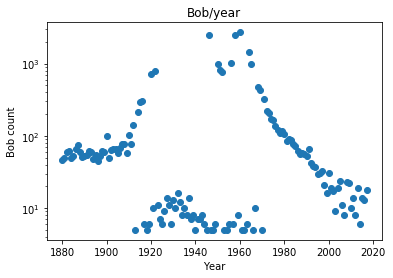

In [30]:
import matplotlib.pyplot as plt

plt.scatter(y, coc)
plt.title('Bob/year')       # name of diagramm
plt.xlabel('Year')      
plt.ylabel('Bob count')
plt.yscale ('log')
#plt.yticks([0,2,4,6,8],['0','2B','4B', '6B', '8B'])
plt.show()

## Задание 1

In [2]:
import pandas as pd
corrupt_data=pd.read_csv("corrupt_data.csv") #

In [3]:
corrupt_data

,|timestamp|amperage|voltage|pillar
0,0|2018-04-15 03:00:02|0.25|229.19|pillar_28
1,1|2018-04-15 03:00:03|0.12|258.26|pillar_17
2,2|2018-04-15 03:00:03|0.29|248.17|pillar_15
3,3|2018-04-15 03:00:03|0.27|240.52|pillar_18
4,4|2018-04-15 03:00:03|0.44|239.9|pillar_13
5,5|2018-04-15 03:00:03|0.32|250.61|pillar_16
6,6|2018-04-15 03:00:03|0.27|217.87|pillar_27
7,7|2018-04-15 03:00:03|0.39|244.49|pillar_19
8,8|2018-04-15 03:00:03|0.32|256.73|pillar_20
9,9|2018-04-15 03:00:03|0.22|254.29|pillar_36


## Обновление индекса

In [4]:
#df.reset_index()

In [5]:
#with open('corrupt_data.csv') as f:
df = pd.read_csv('corrupt_data.csv', sep = "|", index_col = 0, header = 0)

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df['pillar'] = df['pillar'].str.replace('pillar'+'_','')

In [7]:
df

,timestamp,amperage,voltage,pillar
0,2018-04-15 03:00:02,0.25,229.19,28
1,2018-04-15 03:00:03,0.12,258.26,17
2,2018-04-15 03:00:03,0.29,248.17,15
3,2018-04-15 03:00:03,0.27,240.52,18
4,2018-04-15 03:00:03,0.44,239.9,13
5,2018-04-15 03:00:03,0.32,250.61,16
6,2018-04-15 03:00:03,0.27,217.87,27
7,2018-04-15 03:00:03,0.39,244.49,19
8,2018-04-15 03:00:03,0.32,256.73,20
9,2018-04-15 03:00:03,0.22,254.29,36


## Очистка от пустых значений

# 1.Поиск Nan значений

In [8]:
df.isna().any() # пропуск

timestamp    False
amperage      True
voltage       True
pillar       False
dtype: bool

In [9]:
import numpy as np
df[df.amperage.isnull()].shape # number of cells

(998, 4)

# 2.Очистка

In [10]:
df = df.dropna(axis = 0, how = 'any')

In [11]:
df.isna().any() # пропуск

timestamp    False
amperage     False
voltage      False
pillar       False
dtype: bool

# 3.Конвертация

## Приведение данных к int64 и float

In [12]:
df['voltage']=pd.to_numeric(df['voltage'], errors='coerce')
df['amperage']=pd.to_numeric(df['amperage'], errors='coerce')
df['pillar']=pd.to_numeric(df['pillar'], errors='coerce')
#df['timestamp']=pd.to_datetime(df['timestamp'], errors='coerce')
print(df.dtypes)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


timestamp     object
amperage     float64
voltage      float64
pillar         int64
dtype: object


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# 4.Поиск Nan еще раз

In [13]:
df.isna().any() # пропуск

timestamp    False
amperage      True
voltage       True
pillar       False
dtype: bool

# 5.Очистка 

In [14]:
df

,timestamp,amperage,voltage,pillar
0,2018-04-15 03:00:02,0.25,229.19,28
1,2018-04-15 03:00:03,0.12,258.26,17
2,2018-04-15 03:00:03,0.29,248.17,15
3,2018-04-15 03:00:03,0.27,240.52,18
4,2018-04-15 03:00:03,0.44,239.90,13
5,2018-04-15 03:00:03,0.32,250.61,16
6,2018-04-15 03:00:03,0.27,217.87,27
7,2018-04-15 03:00:03,0.39,244.49,19
8,2018-04-15 03:00:03,0.32,256.73,20
9,2018-04-15 03:00:03,0.22,254.29,36


In [15]:
import matplotlib.pyplot as plt 
plt.plot(df.index,df['amperage'])
plt.show()

<Figure size 640x480 with 1 Axes>

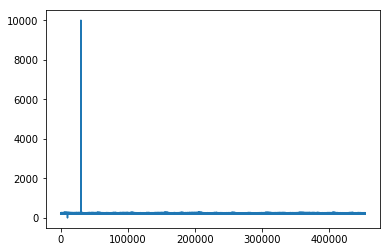

In [16]:
import matplotlib.pyplot as plt 
plt.plot(df.index,df['voltage'])
plt.show()

/usr/local/lib64/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib64/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


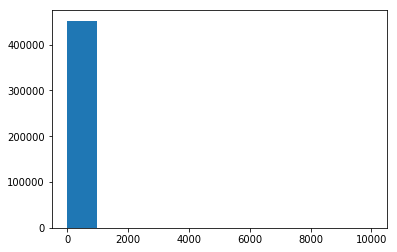

In [17]:
plt.hist(df.voltage, bins = 10) # number of segments
plt.show()

## Очистка от не корректных значений:
## 1.Замена их средним по столбцу

In [22]:
df.voltage.mean()

239.53639916143857

In [23]:
df.amperage.mean()

0.16253775406178197

In [30]:
df.loc[df['voltage'] > 500, 'voltage'] = df.voltage.mean()
df.loc[df['voltage'] < 15, 'voltage'] = df.voltage.mean()
df[df.voltage<15]

,timestamp,amperage,voltage,pillar,Fvoltage


## 2.Удаление строки целиком

In [104]:
df = df.loc[df['voltage'] < 500]

In [105]:
df[df.voltage<10]

,timestamp,amperage,voltage,pillar
10000,2018-04-15 07:54:08,0.1,0.0,15


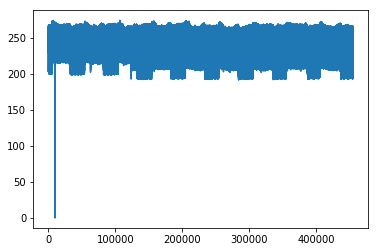

In [106]:
import matplotlib.pyplot as plt 
plt.plot(df.index,df['voltage'])
plt.show()

In [107]:
df = df.loc[df['voltage'] > 10]

In [108]:
df[df.voltage<10]

,timestamp,amperage,voltage,pillar


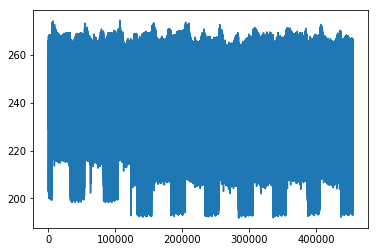

In [109]:
import matplotlib.pyplot as plt 
plt.plot(df.index,df['voltage'])
plt.show()

In [110]:
df

,timestamp,amperage,voltage,pillar
0,2018-04-15 03:00:02,0.25,229.19,28
1,2018-04-15 03:00:03,0.12,258.26,17
2,2018-04-15 03:00:03,0.29,248.17,15
3,2018-04-15 03:00:03,0.27,240.52,18
4,2018-04-15 03:00:03,0.44,239.90,13
5,2018-04-15 03:00:03,0.32,250.61,16
6,2018-04-15 03:00:03,0.27,217.87,27
7,2018-04-15 03:00:03,0.39,244.49,19
8,2018-04-15 03:00:03,0.32,256.73,20
9,2018-04-15 03:00:03,0.22,254.29,36


In [111]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453193 entries, 0 to 454194
Data columns (total 4 columns):
timestamp    453193 non-null datetime64[ns]
amperage     452200 non-null float64
voltage      453193 non-null float64
pillar       453193 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 17.3 MB


In [113]:
df['amperage'] = df['amperage'].astype(float) # int, int64, float, str